### Model Setup

In [115]:
#importing packages
import os
import datetime
import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf 
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt

from Asst_1_Module import WindowGenerator

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [116]:
#load the datasets
URL = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv'

df = pd.read_csv(URL)

### Data Inspection

In [117]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cases_new,1457.0,3613.841455,5954.317880,0.0,182.0,1384.0,3780.0,33406.0
cases_import,1457.0,26.838023,83.126161,0.0,1.0,4.0,10.0,719.0
cases_recovered,1457.0,3577.477008,5905.251973,0.0,160.0,1390.0,3804.0,33872.0
cases_active,1457.0,43642.861359,66137.851106,1.0,10129.0,18280.0,43883.0,323791.0
cases_cluster,1457.0,366.724777,661.009527,0.0,0.0,27.0,447.0,3394.0
cases_unvax,1457.0,1398.457790,2499.087764,0.0,38.0,201.0,1458.0,12681.0
cases_pvax,1457.0,299.695264,1084.673705,0.0,0.0,4.0,27.0,7315.0
cases_fvax,1457.0,967.132464,2083.567121,0.0,0.0,82.0,558.0,13060.0
cases_boost,1457.0,948.555937,2435.958529,0.0,0.0,82.0,840.0,18170.0
cases_child,1457.0,442.281400,827.382406,0.0,11.0,98.0,364.0,4389.0


In [118]:
df.info()  
#only date is in object dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1457 non-null   object 
 1   cases_new                1457 non-null   int64  
 2   cases_import             1457 non-null   int64  
 3   cases_recovered          1457 non-null   int64  
 4   cases_active             1457 non-null   int64  
 5   cases_cluster            1457 non-null   int64  
 6   cases_unvax              1457 non-null   int64  
 7   cases_pvax               1457 non-null   int64  
 8   cases_fvax               1457 non-null   int64  
 9   cases_boost              1457 non-null   int64  
 10  cases_child              1457 non-null   int64  
 11  cases_adolescent         1457 non-null   int64  
 12  cases_adult              1457 non-null   int64  
 13  cases_elderly            1457 non-null   int64  
 14  cases_0_4               

In [119]:
df.duplicated().sum()  #there are no duplicated data

0

In [120]:
df.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2020-01-25,4,4,0,4,0,4,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-26,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-27,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-28,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-29,3,3,0,7,0,3,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning and Preprocessing

In [121]:
#drop the date into a separate variable
date = pd.to_datetime(df.pop('date'), format='%Y-%m-%d')

In [122]:
#replace empty string with NaN
df = df.replace(r'^\s*$', np.NaN, regex=True)
#replace '?' with NaN
df= df.replace('?', np.NaN)
#convert to float
df = df.astype('float')

In [123]:
df.info()   #cases_new is now in float data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                1457 non-null   float64
 1   cases_import             1457 non-null   float64
 2   cases_recovered          1457 non-null   float64
 3   cases_active             1457 non-null   float64
 4   cases_cluster            1457 non-null   float64
 5   cases_unvax              1457 non-null   float64
 6   cases_pvax               1457 non-null   float64
 7   cases_fvax               1457 non-null   float64
 8   cases_boost              1457 non-null   float64
 9   cases_child              1457 non-null   float64
 10  cases_adolescent         1457 non-null   float64
 11  cases_adult              1457 non-null   float64
 12  cases_elderly            1457 non-null   float64
 13  cases_0_4                1457 non-null   float64
 14  cases_5_11              

In [124]:
df.isna().sum()   #cluster columns contain null values

cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             356
cluster_religious          356
cluster_community          356
cluster_highRisk           356
cluster_education          356
cluster_detentionCentre    356
cluster_workplace          356
dtype: int64

In [125]:
df.fillna(0, inplace=True)
df.isna().sum()

cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64

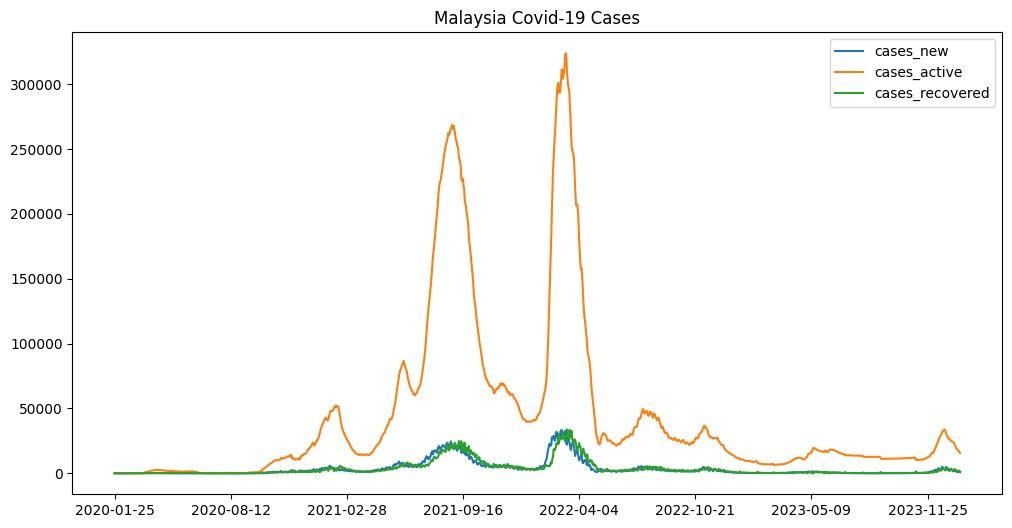

In [126]:
plt.figure(figsize = (12, 6))
plt.plot(date, df['cases_new'])
plt.plot(date, df['cases_active'])
plt.plot(date, df['cases_recovered'])
plt.legend(['cases_new','cases_active','cases_recovered'])
plt.title('Malaysia Covid-19 Cases')
plt.xticks(date[::200])
plt.show()

### Data Splitting

In [127]:
n = len(df)

#split df into train 70% - val 20% - test 10%
train_df = df[0:int(n*0.7)]       
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

### Data Normalization: Standard Scaling

In [128]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

### Model Development

#### Single Step Forecasting

In [129]:
#create a single step window
#we use 30 days worth of data to predict the new case for the next day
window1 = WindowGenerator(input_width=30, label_width=30, shift=1,
                         train_df=train_df, val_df=val_df, test_df=test_df,
                         label_columns=['cases_new'], batch_size=32)
window1 

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['cases_new']

In [133]:
#create single step LSTM model
lstm_single_step = tf.keras.Sequential()
lstm_single_step.add(tf.keras.layers.LSTM(32, activation='relu', return_sequences=True))
lstm_single_step.add(tf.keras.layers.Dropout(0.2))
lstm_single_step.add(tf.keras.layers.LSTM(16, return_sequences=True))
lstm_single_step.add(tf.keras.layers.Dropout(0.2))
lstm_single_step.add(tf.keras.layers.LSTM(16, return_sequences=True))
lstm_single_step.add(tf.keras.layers.Dense(1))

In [136]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
  
  logpath=os.path.join(os.getcwd(),'tensorboard_log',datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard = tf.keras.callbacks.TensorBoard(logpath)

  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                       validation_data=window.val,                    
                      callbacks=[early_stopping, tensorboard])
  return history

In [137]:
#compile and fit 
history_single_step = compile_and_fit(lstm_single_step, window1)

Epoch 1/100
31/31 [==============================] - 10s 94ms/step - loss: 0.0241 - mean_absolute_percentage_error: 74.0319 - val_loss: 0.0021 - val_mean_absolute_percentage_error: 5.6843
Epoch 2/100
31/31 [==============================] - 1s 45ms/step - loss: 0.0225 - mean_absolute_percentage_error: 75.2981 - val_loss: 0.0018 - val_mean_absolute_percentage_error: 4.8291
Epoch 3/100
31/31 [==============================] - 1s 43ms/step - loss: 0.0209 - mean_absolute_percentage_error: 71.6320 - val_loss: 0.0016 - val_mean_absolute_percentage_error: 4.5801
Epoch 4/100
31/31 [==============================] - 1s 46ms/step - loss: 0.0208 - mean_absolute_percentage_error: 70.1421 - val_loss: 0.0014 - val_mean_absolute_percentage_error: 4.3491
Epoch 5/100
31/31 [==============================] - 2s 50ms/step - loss: 0.0199 - mean_absolute_percentage_error: 68.8376 - val_loss: 0.0016 - val_mean_absolute_percentage_error: 4.9526
Epoch 6/100
31/31 [==============================] - 2s 49ms/ste

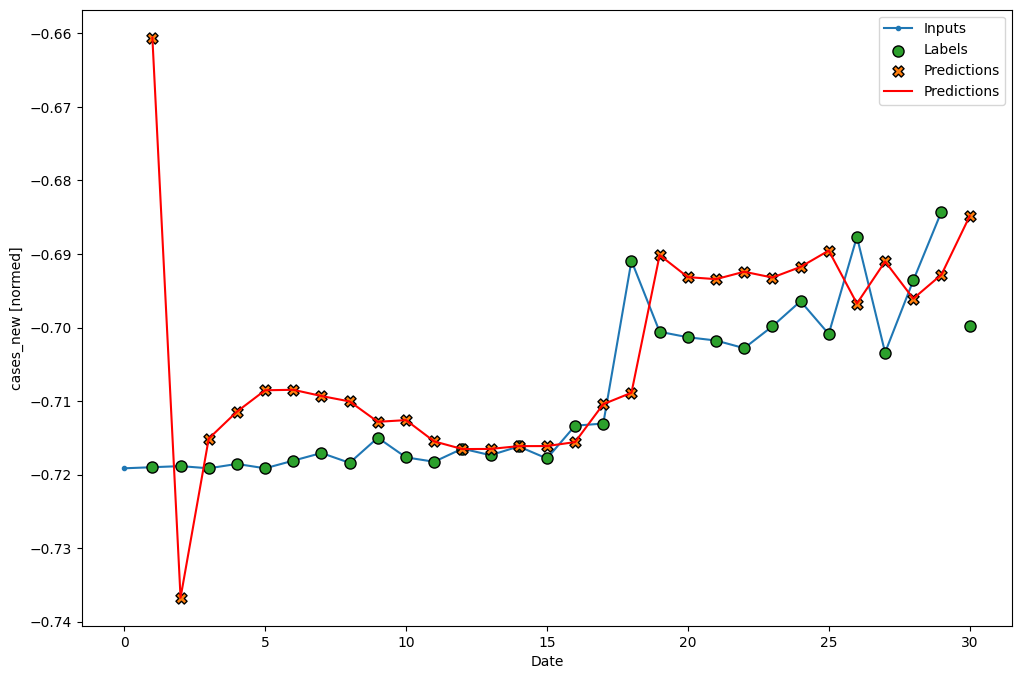

In [ ]:
#plot result
window1.plot(model=lstm_single_step, plot_col='cases_new')

#### Multi Step Forecasting

In [ ]:
#create a multi step window
#we use 30 days worth of data to predict the new cases for the next 30 days
OUT_STEPS = 30
window2 = WindowGenerator(input_width=30, label_width=OUT_STEPS, shift=OUT_STEPS,
                          train_df=train_df, val_df=val_df, test_df=test_df, 
                          label_columns=['cases_new'], batch_size=32)
window2

Total window size: 60
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Label column name(s): ['cases_new']

In [ ]:
#create multistep LSTM model
lstm_multi_step = tf.keras.Sequential()
lstm_multi_step.add(tf.keras.layers.LSTM(32, return_sequences=False))
lstm_multi_step.add(tf.keras.layers.Dense(32, activation='relu'))
lstm_multi_step.add(tf.keras.layers.Dense(32, activation='relu'))
lstm_multi_step.add(tf.keras.layers.Dense(OUT_STEPS*num_features))
lstm_multi_step.add(tf.keras.layers.Reshape([OUT_STEPS, num_features]))

#compile and fit
history_multi_step = compile_and_fit(lstm_multi_step, window2)

Epoch 1/100
30/30 [==============================] - 5s 40ms/step - loss: 0.9304 - mean_absolute_percentage_error: 114.6959 - val_loss: 0.0543 - val_mean_absolute_percentage_error: 27.5963
Epoch 2/100
30/30 [==============================] - 1s 16ms/step - loss: 0.4721 - mean_absolute_percentage_error: 203.8476 - val_loss: 0.0117 - val_mean_absolute_percentage_error: 13.9627
Epoch 3/100
30/30 [==============================] - 1s 17ms/step - loss: 0.1877 - mean_absolute_percentage_error: 174.0726 - val_loss: 0.0110 - val_mean_absolute_percentage_error: 12.7533
Epoch 4/100
30/30 [==============================] - 1s 17ms/step - loss: 0.1085 - mean_absolute_percentage_error: 144.8548 - val_loss: 0.0191 - val_mean_absolute_percentage_error: 17.5296
Epoch 5/100
30/30 [==============================] - 1s 17ms/step - loss: 0.0914 - mean_absolute_percentage_error: 132.6384 - val_loss: 0.0126 - val_mean_absolute_percentage_error: 14.3741


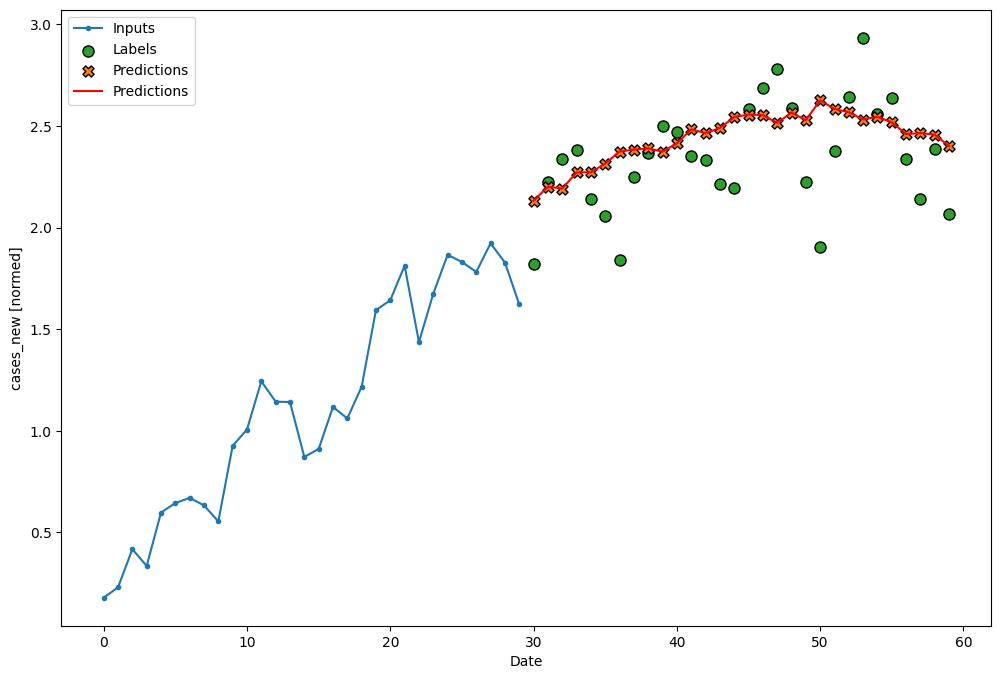

In [ ]:
#plot result
window2.plot(model=lstm_multi_step, plot_col='cases_new')


### Save Model

In [138]:
model_save_path = os.path.join(os.getcwd(), 'saved_model', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
os.makedirs(model_save_path, exist_ok=True)

lstm_single_step.save(model_save_path)
lstm_multi_step.save(model_save_path)

INFO:tensorflow:Assets written to: c:\Users\HP\Documents\SHRDC\YPAI07_CPU\Hands On\Assesments\Exercise_1_Covid19_Cases_Prediction\saved_model\20240123-224208\assets


INFO:tensorflow:Assets written to: c:\Users\HP\Documents\SHRDC\YPAI07_CPU\Hands On\Assesments\Exercise_1_Covid19_Cases_Prediction\saved_model\20240123-224208\assets


INFO:tensorflow:Assets written to: c:\Users\HP\Documents\SHRDC\YPAI07_CPU\Hands On\Assesments\Exercise_1_Covid19_Cases_Prediction\saved_model\20240123-224208\assets


INFO:tensorflow:Assets written to: c:\Users\HP\Documents\SHRDC\YPAI07_CPU\Hands On\Assesments\Exercise_1_Covid19_Cases_Prediction\saved_model\20240123-224208\assets
